Import data

In [2]:
import numpy as np
import pandas as pd

df = pd.read_csv('XYZloan_default_selected_vars.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,id,loan_default,AP001,AP002,AP003,AP004,AP005,AP006,...,CD162,CD164,CD166,CD167,CD169,CD170,CD172,CD173,MB005,MB007
0,0,1,1,1,31,2,1,12,2017/7/6 10:21,ios,...,13.0,13.0,0.0,0.0,1449.0,1449.0,2249.0,2249.0,7.0,IPHONE7
1,1,2,2,0,27,1,1,12,2017/4/6 12:51,h5,...,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,NaN,WEB
2,2,3,3,0,33,1,4,12,2017/7/1 14:11,h5,...,3.0,2.0,33.0,0.0,33.0,0.0,143.0,110.0,8.0,WEB
3,3,4,4,0,34,2,4,12,2017/7/7 10:10,android,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,OPPO
4,4,5,5,0,47,2,1,12,2017/7/6 14:37,h5,...,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,NaN,WEB


<AxesSubplot:>

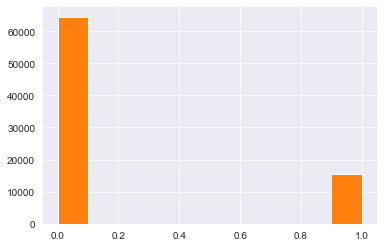

In [3]:
df['loan_default'].hist()
df.loan_default.hist()

<AxesSubplot:>

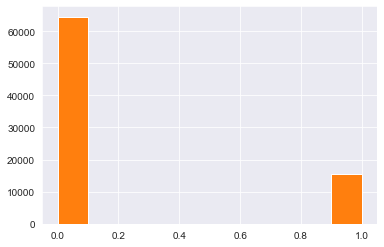

In [4]:
%matplotlib inline
df['loan_default'].hist()
df.loan_default.hist()

In [5]:
df['loan_default'].value_counts()

0    64512
1    15488
Name: loan_default, dtype: int64

In [6]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'id', 'loan_default', 'AP001', 'AP002',
       'AP003', 'AP004', 'AP005', 'AP006', 'AP007', 'AP008', 'AP009', 'TD001',
       'TD002', 'TD005', 'TD006', 'TD009', 'TD010', 'TD013', 'TD014', 'TD015',
       'TD022', 'TD023', 'TD024', 'TD025', 'TD026', 'TD027', 'TD028', 'TD029',
       'TD044', 'TD048', 'TD051', 'TD054', 'TD055', 'TD061', 'TD062', 'CR004',
       'CR005', 'CR009', 'CR012', 'CR015', 'CR017', 'CR018', 'CR019', 'PA022',
       'PA023', 'PA028', 'PA029', 'PA030', 'PA031', 'CD008', 'CD018', 'CD071',
       'CD072', 'CD088', 'CD100', 'CD101', 'CD106', 'CD107', 'CD108', 'CD113',
       'CD114', 'CD115', 'CD117', 'CD118', 'CD120', 'CD121', 'CD123', 'CD130',
       'CD131', 'CD132', 'CD133', 'CD135', 'CD136', 'CD137', 'CD152', 'CD153',
       'CD160', 'CD162', 'CD164', 'CD166', 'CD167', 'CD169', 'CD170', 'CD172',
       'CD173', 'MB005', 'MB007'],
      dtype='object')

# EDA

Transform variables as needed

In [7]:
df['CR009_1'] = pd.cut(df['CR009'],5,duplicates='drop')
df['PA022_1'] = pd.cut(df['PA022'],5,duplicates='drop')
df['PA023_1'] = pd.cut(df['PA023'],5,duplicates='drop')
df['PA029_1'] = pd.cut(df['PA029'],5,duplicates='drop')

Create Features

In [8]:
feature = ['AP001', 'AP003', 'AP008','CR009_1', 'CR015', 'CR019','PA022_1', 'PA023_1', 'PA029_1','TD001', 'TD005', 'TD006', 'TD009', 'TD010', 'TD014']

Polt in the order of
- AP001, AP003, AP008
- CR009, CR015, CR019
- PA022, PA023, PA029
- TD001, TD005, TD006, TD009, TD010, TD014

AP001


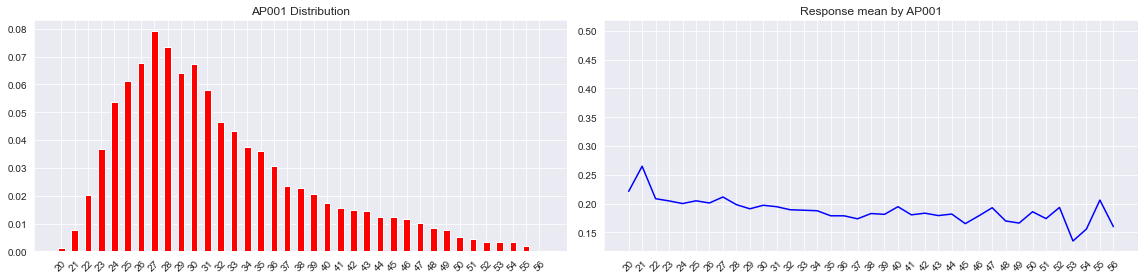

AP003


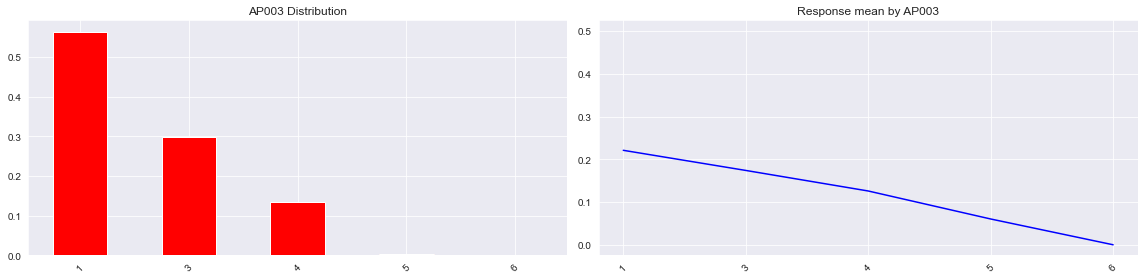

AP008


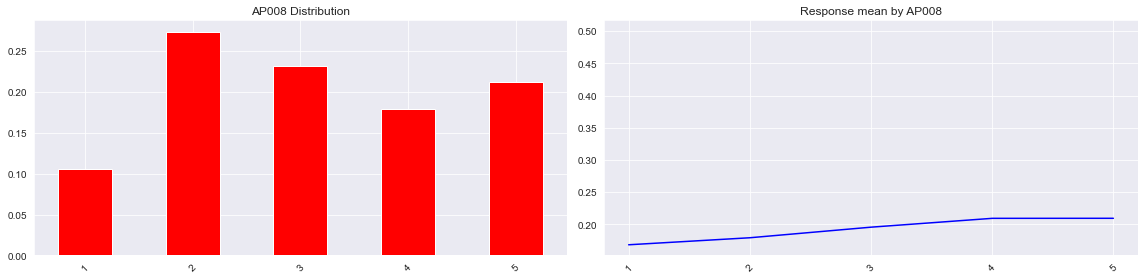

CR009_1


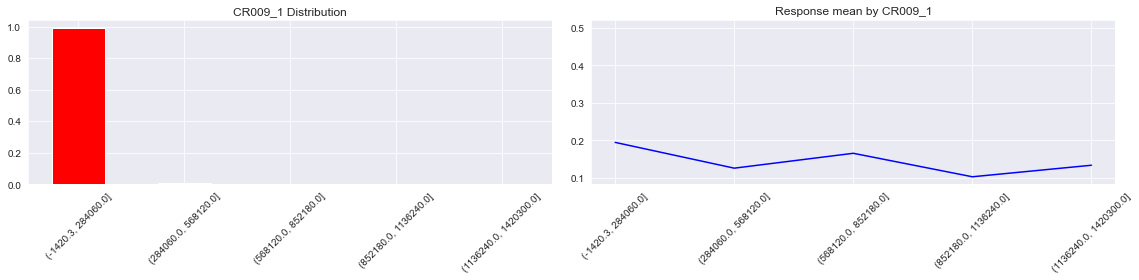

CR015


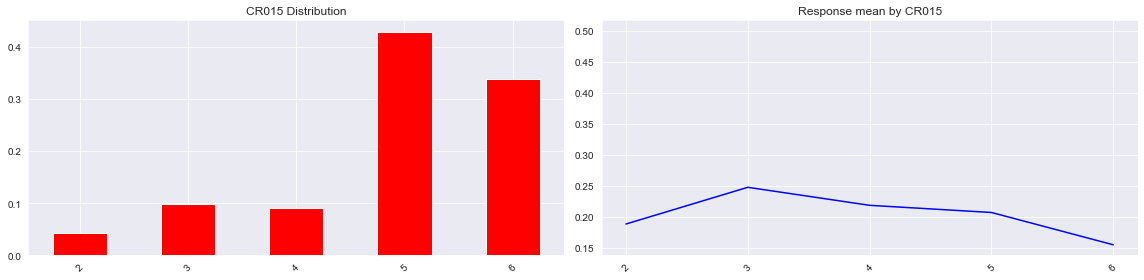

CR019


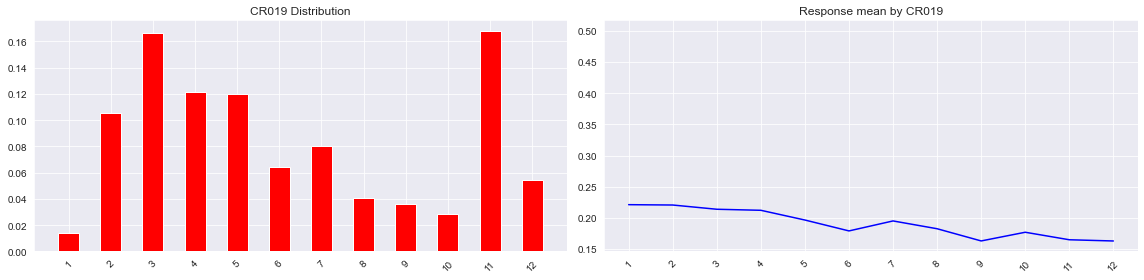

PA022_1


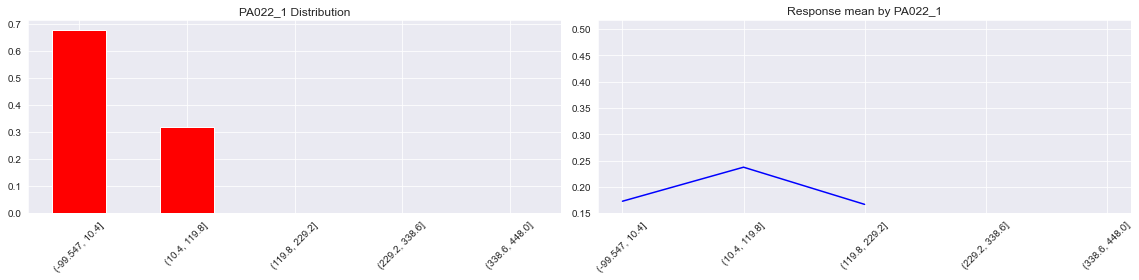

PA023_1


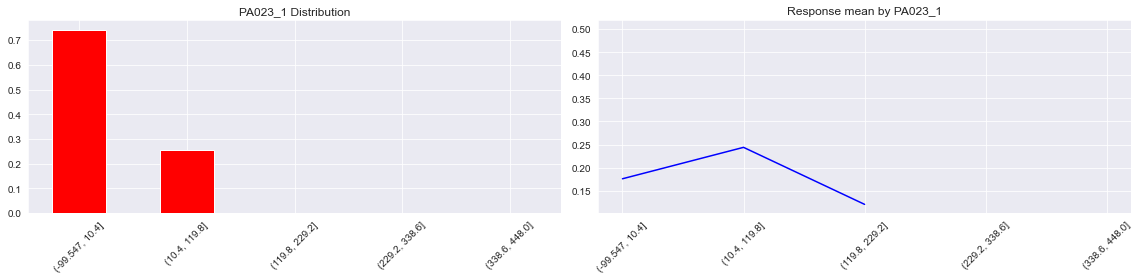

PA029_1


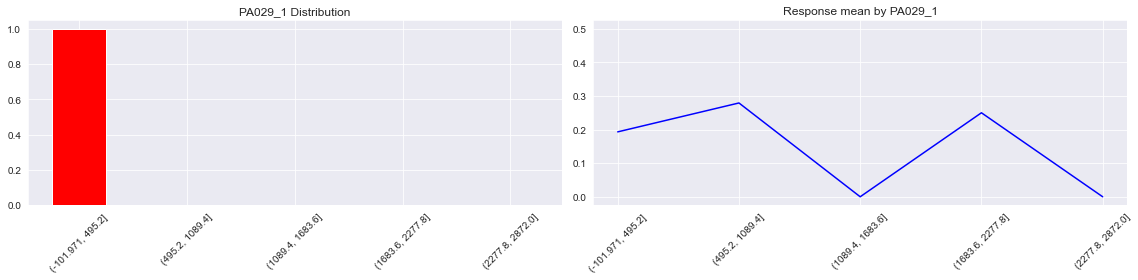

TD001


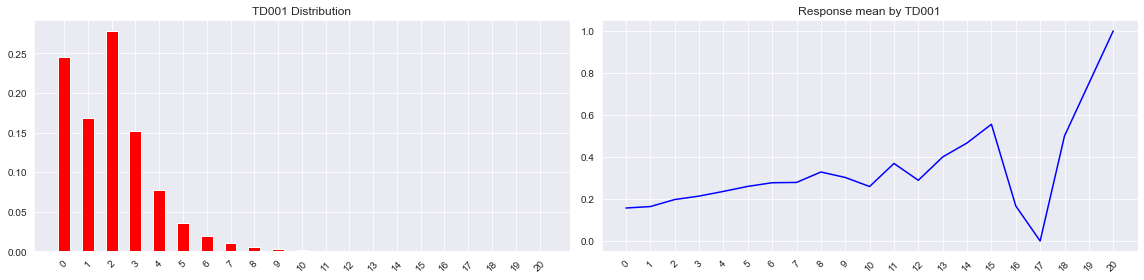

TD005


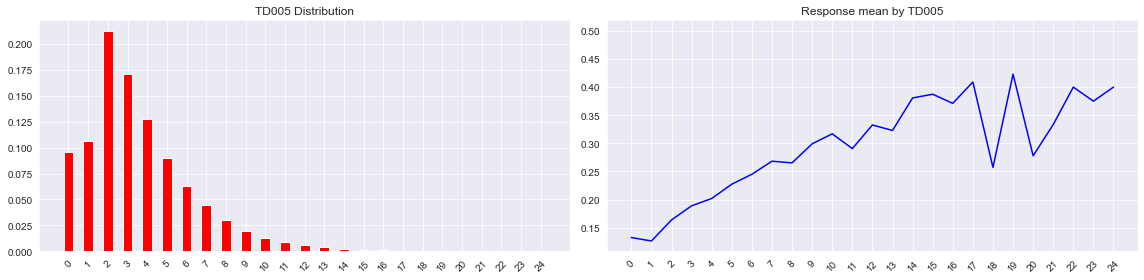

TD006


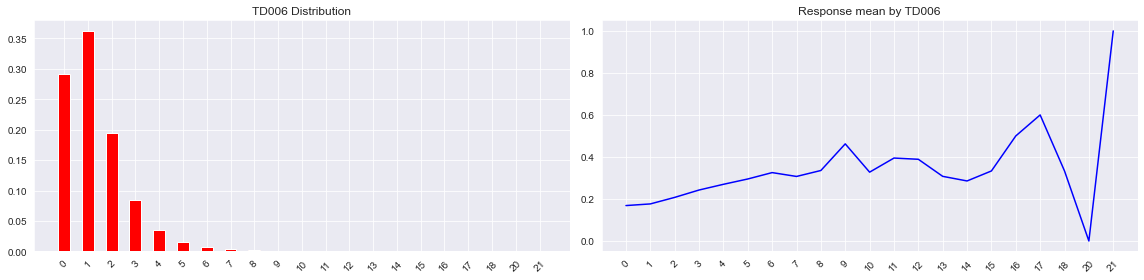

TD009


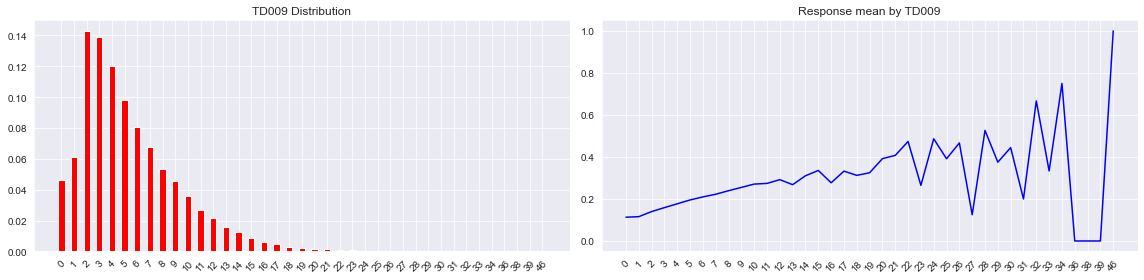

TD010


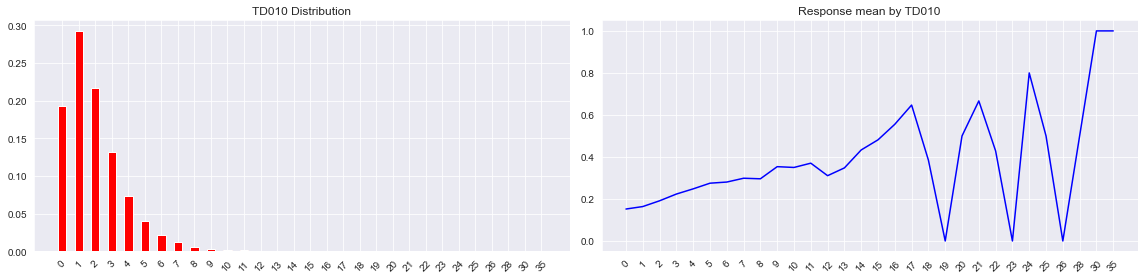

TD014


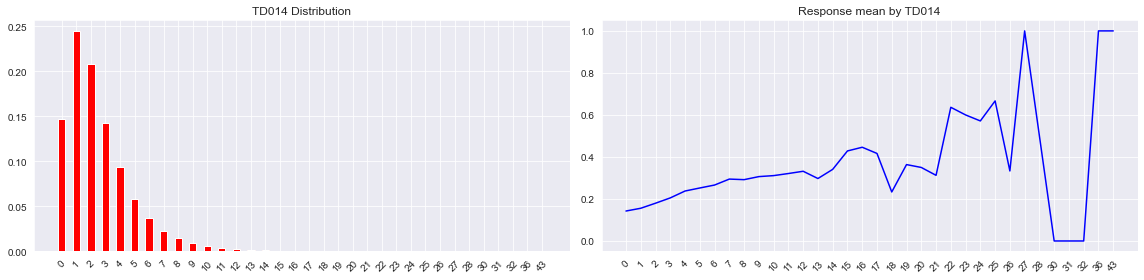

In [9]:
import matplotlib.pyplot as plt

def plot_X_and_Y(var):
    print(var)
    z = df.groupby(var)['loan_default'].agg(['count','mean']).reset_index()
    z['count_pcnt'] = z['count']/z['count'].sum()
    x = z[var]
    y_mean = z['mean']
    count_pcnt = z['count_pcnt']
    ind = np.arange(0, len(x))
    width = .5

    fig = plt.figure(figsize=(16,4))
    plt.subplot(121)
    plt.bar(ind, count_pcnt, width, color='r')
    #plt.ylabel('X')
    plt.title(var + ' Distribution')
    plt.xticks(ind,x.tolist(), rotation=45)

    plt.subplot(122)
    #plt.bar(ind, y_mean, width, color='b')
    plt.plot(ind, y_mean, width, color='b')
    #plt.ylabel('Y by X')
    plt.xticks(ind,x.tolist(), rotation=45)
    plt.tight_layout()
    plt.title('Response mean by ' + var)
    plt.show()

for i in feature:
    plot_X_and_Y(i)

AP001: This variable represents age. The most of the data are between 23 and 36. The y value (loan default rate) decreases  with the age increases.

AP003: This variable represents education. Over 50% of data has education level 1. When education level increase, the loan default rate increase.

AP008: This variable represents city. It does not show a clear trend itself. The loan default rate is higher for city 4 and 5.

CR009: This variable represents loan amount, the amount is mostly below 284060. The loan default rate is the highest in this range as well.

CR015: This variable represents the number of months that have completed since the loan origination Date. Most data has MOB of 4 and 5. Those with MOB of 3 has the highest default rate.

CR019: This variable represents the score of single debit card limit. The default rate decreases as the score increases.

PA022: This variable represents the days between application and first collection or high risk call. The highest default rate is within the range -99.547 to 119.8.

PA023: This variable represents the days between application and first collection.The hightest default rate is within range -99.547 to 10.4.

PA029: This variable represents the average length of collection or high risk inbound calls. The highest default rate is within range  -101.971 to 495.2.

TD001:This variable represents the count of query of P2P from last 7 days to today. The default rate overall is increasing except for 17.

TD005: This variable represents the count of query of P2P from last one month to today. The default rate  is mostly increasing (except for 18 and 20).

TD006: This variable represents the count of query of small loan from last one month until today. The default rate is mostly increasing (except for 20).

TD009: This variable represents the count of query of P2P from last three months to today. The default rate is mostly increasing (except 3639).

TD010:This variable represents the count of query of small loan from last three months to today. The default rate overall is increasing,but fluctuated greatly within 1926.

TD014: This variable represents the count of query of small loan from last six months to today. The default rate is mostly increasing (except 26, 30-32).


# Decision Tree Model

Drop null values

In [10]:
df = df[df['PA022'].notnull()]
df = df[df['PA023'].notnull()]
df = df[df['PA029'].notnull()]

In [11]:
target = df['loan_default']
del df['loan_default']

Split data to train and test

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

train_X,test_X,train_y,test_y = train_test_split(df,target,test_size=0.2,shuffle=True)
train = pd.concat([train_X, train_y], axis = 1)
test = pd.concat([test_X, test_y], axis = 1)

In [13]:
train['AP003'] = train['AP003'].astype('category',copy=False)
train['AP008'] = train['AP008'].astype('category',copy=False)

Predict without woe

In [14]:
train_no_woe = train[['AP001', 'AP003', 'AP008','CR009', 'CR015', 'CR019','PA022', 'PA023', 'PA029','TD001', 'TD005', 'TD006', 'TD009', 'TD010', 'TD014','loan_default']]
test_no_woe = test[['AP001', 'AP003', 'AP008','CR009', 'CR015', 'CR019','PA022', 'PA023', 'PA029','TD001', 'TD005', 'TD006', 'TD009', 'TD010', 'TD014','loan_default']]
feature_no_woe = ['AP001', 'AP003', 'AP008','CR009', 'CR015', 'CR019','PA022', 'PA023', 'PA029','TD001', 'TD005', 'TD006', 'TD009', 'TD010', 'TD014']

In [15]:
from sklearn.tree import DecisionTreeClassifier

tree1 = DecisionTreeClassifier(min_samples_leaf = 5, max_depth = 6)
tree1.fit(train_no_woe[feature_no_woe],train_no_woe['loan_default'])

DecisionTreeClassifier(max_depth=6, min_samples_leaf=5)

Print accuracy

In [16]:
tree1.predict(test_no_woe[feature_no_woe][0:10])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [17]:
tree1.score(test_no_woe[feature_no_woe],test_no_woe['loan_default'])

0.8036297412710375

The accuracy rate of this model is 0.8066.

Plot the distribution of X variables

<AxesSubplot:xlabel='feature'>

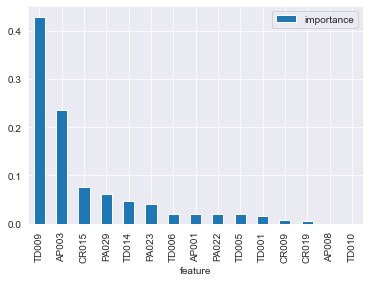

In [18]:
importances = pd.DataFrame({'feature': train_no_woe[feature_no_woe].columns, 'importance': np.round(tree1.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)
importances.plot.bar(x='feature')

From the graph, the most important features are TD009, AP003, and CR015.

Conduct WOE for both train and test data

In [19]:
import category_encoders as ce
ec = ce.WOEEncoder()
train_woe= train[['loan_default','AP001','AP003', 'AP008','CR009_1', 'CR015', 'CR019','PA022_1', 'PA023_1', 'PA029_1','TD001', 'TD005', 'TD006', 'TD009', 'TD010', 'TD014']]
var_c = ('AP003', 'AP008','CR009_1','PA022_1', 'PA023_1', 'PA029_1')

In [20]:
for i in var_c:
    X = train_woe[i]
    y = train_woe['loan_default']
    x_WOE = ec.fit(X, y)
    x_cleaned = ec.transform(X).round(2)
    df_woe = pd.DataFrame()
    df_woe[i] = train_woe[i]
    df_woe[i+'_woe'] = x_cleaned
    df_woe = df_woe.drop_duplicates()
    train_woe = pd.merge(train_woe, df_woe, on = i, how = 'left')

In [21]:
test['AP003'] = test['AP003'].astype('category', copy=False)
test['AP008'] = test['AP008'].astype('category', copy=False)
test['CR009_1'] = pd.cut(test['CR009'], bins=[-1420.3, 284060.0, 568120.0, 852180.0, 1136240.0, 1420300.0],
                         duplicates='drop')
test['CR009_1'] = test['CR009_1'].astype('category', copy=False)
test['PA022_1'] = pd.cut(test['PA022'], bins=[-99.544, 9.8, 118.6, 227.4, 336.2, 445], duplicates='drop')
test['PA022_1'] = test['PA022_1'].astype('category', copy=False)
test['PA023_1'] = pd.cut(test['PA023'], bins=[-99.544, 9.8, 118.6, 227.4, 336.2, 445], duplicates='drop')
test['PA023_1'] = test['PA023_1'].astype('category', copy=False)
test['PA029_1'] = pd.cut(test['PA029'], bins=[-101.971, 495.2, 1089.4, 1683.6, 2277.8, 2872.0], duplicates='drop')
test['PA029_1'] = test['PA029_1'].astype('category', copy=False)
test_woe= test[['loan_default','AP001','AP003', 'AP008','CR009_1', 'CR015', 'CR019','PA022_1', 'PA023_1', 'PA029_1','TD001', 'TD005', 'TD006', 'TD009', 'TD010', 'TD014']]
var_c = ('AP003', 'AP008','CR009_1','PA022_1', 'PA023_1', 'PA029_1')
for i in var_c:
    X = test_woe[i]
    y = test_woe['loan_default']
    x_WOE = ec.fit(X, y)
    x_cleaned = ec.transform(X).round(2)
    df_woe = pd.DataFrame()
    df_woe[i] = test_woe[i]
    df_woe[i+'_woe'] = x_cleaned
    df_woe = df_woe.drop_duplicates()
    test_woe = pd.merge(test_woe, df_woe, on = i, how = 'left')

In [22]:
feature = ['AP001', 'AP003_woe', 'AP008_woe','CR009_1_woe', 'CR015', 'CR019','PA022_1_woe', 'PA023_1_woe', 'PA029_1_woe','TD001', 'TD005', 'TD006', 'TD009', 'TD010', 'TD014']

Print accuracy

In [23]:
tree1.fit(train_woe[feature],train_woe['loan_default'])
tree1.predict(test_woe[feature])

array([0, 0, 0, ..., 0, 0, 0])

In [24]:
tree1.score(test_woe[feature],test_woe['loan_default'])

0.8039437327304697

The accuracy rate of the model with WOE is 0.8052, slightly lower than the previous one.

Plot the distribution of X variables

<AxesSubplot:xlabel='feature'>

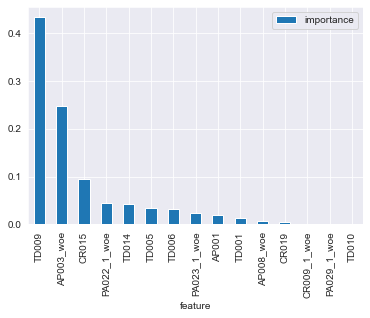

In [25]:
importances = pd.DataFrame({'feature': train_woe[feature].columns, 'importance': np.round(tree1.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)
importances.plot.bar(x='feature')

Same as the without WOE version, the most important features are TD009, AP003, and CR015.

# ROC

Print ROC accuracy for no WOE

In [26]:
from sklearn.metrics import roc_curve,roc_auc_score

y_pred_no_woe = tree1.predict_proba(test_no_woe[feature_no_woe])[:,1]
roc_auc_value_no_woe = roc_auc_score(test_no_woe['loan_default'],y_pred_no_woe)
roc_auc_value_no_woe

0.6125000376948068

Print ROC accuracy for WOE

In [27]:
y_pred = tree1.predict_proba(test_woe[feature])[:,1]
roc_auc_value = roc_auc_score(test_woe['loan_default'],y_pred)
roc_auc_value

0.6369264986449974

The ROC accuracy with WOE is higher than the model without WOE.

Graph ROC value for no WOE

In [28]:
fpr, tpr, _ = roc_curve(test_no_woe['loan_default'], y_pred_no_woe)
[fpr,tpr]

[array([0.00000000e+00, 1.56006240e-04, 1.79407176e-03, 1.30265211e-02,
        2.56630265e-02, 2.76131045e-02, 3.75975039e-02, 7.08268331e-02,
        1.15834633e-01, 1.45631825e-01, 2.02808112e-01, 2.18408736e-01,
        2.22854914e-01, 2.24648986e-01, 2.44305772e-01, 2.53588144e-01,
        2.75819033e-01, 2.82917317e-01, 3.30421217e-01, 3.79563183e-01,
        3.83853354e-01, 4.19656786e-01, 4.48361934e-01, 5.34165367e-01,
        5.58892356e-01, 6.64040562e-01, 6.82605304e-01, 7.10686427e-01,
        7.84009360e-01, 8.99453978e-01, 1.00000000e+00]),
 array([0.        , 0.        , 0.00418814, 0.03092784, 0.04768041,
        0.05541237, 0.06926546, 0.12951031, 0.19974227, 0.25773196,
        0.33698454, 0.36630155, 0.36984536, 0.37210052, 0.39722938,
        0.40528351, 0.42751289, 0.4375    , 0.48936856, 0.54993557,
        0.55509021, 0.58666237, 0.61372423, 0.69201031, 0.71617268,
        0.79929124, 0.81185567, 0.82764175, 0.87628866, 0.95521907,
        1.        ])]

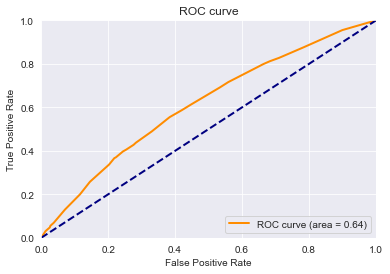

In [29]:
import matplotlib.pyplot as plt
lw=2
plt.figure(figsize=(6,4))
plt.plot(fpr,tpr, color='darkorange',lw=lw,label='ROC curve (area = %0.2f)' %roc_auc_value)
plt.plot([0,1],[0,1], color='navy',lw=lw,linestyle='--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.show()

Graph ROC value for WOE

In [30]:
fpr, tpr, _ = roc_curve(test_woe['loan_default'], y_pred)
[fpr,tpr]

[array([0.00000000e+00, 7.80031201e-05, 9.36037441e-04, 1.01404056e-03,
        1.79407176e-03, 2.49609984e-03, 5.85023401e-03, 6.86427457e-03,
        9.67238690e-03, 9.82839314e-03, 1.47425897e-02, 1.61466459e-02,
        2.91731669e-02, 2.97971919e-02, 3.15912637e-02, 5.08580343e-02,
        5.95943838e-02, 7.44149766e-02, 9.31357254e-02, 9.87519501e-02,
        1.00468019e-01, 1.01638066e-01, 1.10374415e-01, 1.14742590e-01,
        1.22932917e-01, 1.25507020e-01, 1.48517941e-01, 1.72620905e-01,
        1.75741030e-01, 1.77379095e-01, 1.86817473e-01, 1.86973479e-01,
        1.98205928e-01, 2.59516381e-01, 2.81045242e-01, 2.96723869e-01,
        3.04836193e-01, 3.50702028e-01, 3.54992200e-01, 3.66302652e-01,
        3.78549142e-01, 3.88221529e-01, 4.54056162e-01, 4.69734789e-01,
        4.98595944e-01, 5.09438378e-01, 5.10842434e-01, 5.28783151e-01,
        5.70202808e-01, 6.07098284e-01, 6.86037441e-01, 7.06084243e-01,
        7.22932917e-01, 7.36427457e-01, 7.39157566e-01, 8.068642

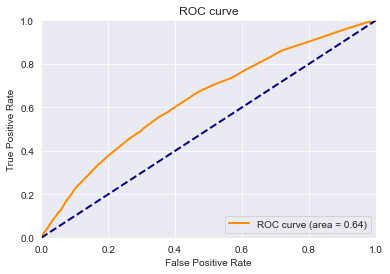

In [31]:
lw = 2
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_value)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.show()

Comparing the graph with and without WOE, the area under the ROC curve are both 0.64, which consist with the accuracy value, both are relatively the same.

# Week 9 Assignment

In [32]:
#!pip install h2o

Get train data with woe from previous assignment

In [33]:
X = train_woe[feature]
y = train_woe['loan_default']
#y = y.to_frame()
train_using = X
train_using['loan_default'] = y
train_using.head()

<ipython-input-33-8a99a1f807a4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_using['loan_default'] = y


,AP001,AP003_woe,AP008_woe,CR009_1_woe,CR015,CR019,PA022_1_woe,PA023_1_woe,PA029_1_woe,TD001,TD005,TD006,TD009,TD010,TD014,loan_default
0,47,0.16,0.00,0.0,6,11,-0.14,-0.12,-0.0,0,0,0,0,0,1,1
1,37,0.16,0.11,0.0,6,4,0.26,0.30,-0.0,0,7,2,12,8,9,0
2,25,0.16,-0.09,0.0,3,8,0.26,-0.12,-0.0,0,2,1,8,6,8,0
3,27,-0.13,0.10,0.0,5,2,-0.14,-0.12,-0.0,2,2,2,4,3,3,0
4,24,-0.50,-0.09,0.0,3,5,0.26,0.30,-0.0,3,5,3,8,3,3,0


Get test data with woe from previous assignment

In [34]:
X = test_woe[feature]
y = test_woe['loan_default']
#y = y.to_frame()
test_using = X
test_using['loan_default'] = y
test_using.head()

<ipython-input-34-5e6f731e7299>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_using['loan_default'] = y


,AP001,AP003_woe,AP008_woe,CR009_1_woe,CR015,CR019,PA022_1_woe,PA023_1_woe,PA029_1_woe,TD001,TD005,TD006,TD009,TD010,TD014,loan_default
0,35,0.18,0.05,0.01,5,2,-0.13,-0.12,-0.0,0,4,1,5,2,2,0
1,26,-0.53,-0.10,0.01,4,3,0.26,0.30,-0.0,3,7,1,9,1,4,0
2,25,-0.15,0.05,0.01,3,4,-0.13,-0.12,-0.0,3,6,1,8,1,1,0
3,39,0.18,0.11,0.01,5,4,-0.13,-0.12,-0.0,3,3,1,6,2,2,0
4,25,-0.15,0.06,0.01,5,6,0.26,0.30,-0.0,1,3,1,4,2,2,1


# H2O

Initialize h2o

In [35]:
import h2o
from h2o.estimators import H2OGradientBoostingEstimator
from h2o.estimators import H2ODeepLearningEstimator
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.13" 2021-10-19; OpenJDK Runtime Environment JBR-11.0.13.7-1751.21-jcef (build 11.0.13+7-b1751.21); OpenJDK 64-Bit Server VM JBR-11.0.13.7-1751.21-jcef (build 11.0.13+7-b1751.21, mixed mode)
  Starting server from /opt/anaconda3/lib/python3.8/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/zr/nth0p58d0lncg_nv89hbpzsm0000gn/T/tmpo3nw8o5m
  JVM stdout: /var/folders/zr/nth0p58d0lncg_nv89hbpzsm0000gn/T/tmpo3nw8o5m/h2o_emilyziyixiao_started_from_python.out
  JVM stderr: /var/folders/zr/nth0p58d0lncg_nv89hbpzsm0000gn/T/tmpo3nw8o5m/h2o_emilyziyixiao_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,America/New_York
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.3
H2O_cluster_version_age:,16 days
H2O_cluster_name:,H2O_from_python_emilyziyixiao_ws9hhp
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,4 Gb
H2O_cluster_total_cores:,16
H2O_cluster_allowed_cores:,16
H2O_cluster_status:,"locked, healthy"


In [36]:
train_using = h2o.H2OFrame(train_using)
test_using = h2o.H2OFrame(test_using)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


# Model Building

Gradient boosting is a type of machine learning boosting. It relies on the intuition that the best possible next model, when combined with previous models, minimizes the overall prediction error. The key idea is to set the target outcomes for this next model in order to minimize the error.

Build and train Gradient Boosting

In [37]:
# Set the predictors and response; set the factors:
predictors = feature
response = 'loan_default'

# Build and train the model:
pros_gbm = H2OGradientBoostingEstimator(nfolds=5,
                                        seed=1111,
                                        keep_cross_validation_predictions = True)
pros_gbm.train(x=predictors, y=response, training_frame=train_using)

# Eval performance:
perf = pros_gbm.model_performance()

# Generate predictions on a test set (if necessary):
pred = pros_gbm.predict(test_using)

# Extract feature interactions:
feature_interactions = pros_gbm.feature_interaction()

gbm Model Build progress: |

/opt/anaconda3/lib/python3.8/site-packages/h2o/estimators/estimator_base.py:193: RuntimeWarning: We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.
  warnings.warn(mesg["message"], RuntimeWarning)


██████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [38]:
print(perf)
print('Average prediction score: ')
print(pred.mean())

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 0.1458228107536637
RMSE: 0.38186753037364113
MAE: 0.29453915736845415
RMSLE: 0.2675948560538521
Mean Residual Deviance: 0.1458228107536637
Average prediction score: 
[0.19538393011076313]


Here are the model performance. We can see that the RMSE is 0.383 and r square is 0.194.

Deep learning is a machine learning technique that uses neural network to train model. It can be thought of as a way to automate predictive analytics. While traditional machine learning algorithms are linear, deep learning algorithms are stacked in a hierarchy of increasing complexity and abstraction.

Build and train Deep Learning Model

In [39]:
# Build and train the model:
dl = H2ODeepLearningEstimator(distribution="tweedie",
                              hidden=[1],
                              epochs=1000,
                              train_samples_per_iteration=-1,
                              reproducible=True,
                              activation="Tanh",
                              single_node_mode=False,
                              balance_classes=False,
                              force_load_balance=False,
                              seed=23123,
                              tweedie_power=1.5,
                              score_training_samples=0,
                              score_validation_samples=0,
                              stopping_rounds=0)
dl.train(x=list(range(14)),
         y='loan_default',
         training_frame=train_using)

# Eval performance:
perf = dl.model_performance()

# Generate predictions on a test set (if necessary):
pred = dl.predict(test_using)

deeplearning Model Build progress: |█████████████████████████████████████████████| (done) 100%
deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%


In [40]:
print(perf)
print('Average prediction score: ')
print(pred.mean())

ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 0.1493664943582049
RMSE: 0.38647961700224875
MAE: 0.2977876131824469
RMSLE: 0.27089673963974226
Mean Residual Deviance: 1.8973963768711934
Average prediction score: 
[0.19784937078478151]


Here are the model performance. We can see that the RMSE is 0.383 and r square is 0.194.

# Model Evaluation

In [41]:
def createGains(model):
    predictions = model.predict(test_using)
    test_scores = test_using['loan_default'].cbind(predictions).as_data_frame()

    #sort on prediction (descending), add id, and decile for groups containing 1/10 of datapoints
    test_scores = test_scores.sort_values(by='loan_default',ascending=False)
    test_scores['row_id'] = range(0,0+len(test_scores))
    test_scores['decile'] = ( test_scores['row_id'] / (len(test_scores)/10) ).astype(int)
    #see count by decile
    test_scores.loc[test_scores['decile'] == 10]=9
    test_scores['decile'].value_counts()

    #create gains table
    gains = test_scores.groupby('decile')['loan_default'].agg(['count','sum'])
    gains.columns = ['count','actual']
    gains

    #add features to gains table
    gains['non_actual'] = gains['count'] - gains['actual']
    gains['cum_count'] = gains['count'].cumsum()
    gains['cum_actual'] = gains['actual'].cumsum()
    gains['cum_non_actual'] = gains['non_actual'].cumsum()
    gains['percent_cum_actual'] = (gains['cum_actual'] / np.max(gains['cum_actual'])).round(2)
    gains['percent_cum_non_actual'] = (gains['cum_non_actual'] / np.max(gains['cum_non_actual'])).round(2)
    gains['if_random'] = np.max(gains['cum_actual']) /10
    gains['if_random'] = gains['if_random'].cumsum()
    gains['lift'] = (gains['cum_actual'] / gains['if_random']).round(2)
    gains['K_S'] = np.abs( gains['percent_cum_actual'] -  gains['percent_cum_non_actual'] ) * 100
    gains['gain']=(gains['cum_actual']/gains['cum_count']*100).round(2)
    gains = pd.DataFrame(gains)
    return(gains)

In [42]:
createGains(pros_gbm)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


,count,actual,non_actual,cum_count,cum_actual,cum_non_actual,percent_cum_actual,percent_cum_non_actual,if_random,lift,K_S,gain
decile,,,,,,,,,,,,
0,1593,1593,0,1593,1593,0,0.51,0.00,310.4,5.13,51.0,100.00
1,1592,1511,81,3185,3104,81,1.00,0.01,620.8,5.00,99.0,97.46
2,1593,0,1593,4778,3104,1674,1.00,0.13,931.2,3.33,87.0,64.96
3,1592,0,1592,6370,3104,3266,1.00,0.25,1241.6,2.50,75.0,48.73
4,1592,0,1592,7962,3104,4858,1.00,0.38,1552.0,2.00,62.0,38.99
5,1593,0,1593,9555,3104,6451,1.00,0.50,1862.4,1.67,50.0,32.49
6,1592,0,1592,11147,3104,8043,1.00,0.63,2172.8,1.43,37.0,27.85
7,1593,0,1593,12740,3104,9636,1.00,0.75,2483.2,1.25,25.0,24.36
8,1592,0,1592,14332,3104,11228,1.00,0.88,2793.6,1.11,12.0,21.66


This is the gains table for gradiant boosting model. We can see the gains and lifts in the table, both in decending order.

In [43]:
createGains(dl)

deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%


,count,actual,non_actual,cum_count,cum_actual,cum_non_actual,percent_cum_actual,percent_cum_non_actual,if_random,lift,K_S,gain
decile,,,,,,,,,,,,
0,1593,1593,0,1593,1593,0,0.51,0.00,310.4,5.13,51.0,100.00
1,1592,1511,81,3185,3104,81,1.00,0.01,620.8,5.00,99.0,97.46
2,1593,0,1593,4778,3104,1674,1.00,0.13,931.2,3.33,87.0,64.96
3,1592,0,1592,6370,3104,3266,1.00,0.25,1241.6,2.50,75.0,48.73
4,1592,0,1592,7962,3104,4858,1.00,0.38,1552.0,2.00,62.0,38.99
5,1593,0,1593,9555,3104,6451,1.00,0.50,1862.4,1.67,50.0,32.49
6,1592,0,1592,11147,3104,8043,1.00,0.63,2172.8,1.43,37.0,27.85
7,1593,0,1593,12740,3104,9636,1.00,0.75,2483.2,1.25,25.0,24.36
8,1592,0,1592,14332,3104,11228,1.00,0.88,2793.6,1.11,12.0,21.66


This is the gains table for deep learning model. We can see the gains and lifts in the table, both in decending order same as previous table.

In [44]:
def ROC_AUC(my_result,df):
    from sklearn.metrics import roc_curve,auc
    from sklearn.metrics import average_precision_score
    from sklearn.metrics import precision_recall_curve
    import matplotlib.pyplot as plt

    # ROC
    y_actual = df['loan_default'].as_data_frame()
    #print(y_actual)
    y_pred = my_result.predict(df[feature]).as_data_frame()
    #print(y_pred)
    fpr,tpr,_ = roc_curve(y_actual,y_pred)
    roc_auc = auc(fpr,tpr)
    #print(fpr)
    # Precision-Recall
    average_precision = average_precision_score(y_actual,y_pred)

    print('')
    print('   * ROC curve: The ROC curve plots the true positive rate vs. the false rositive sate')
    print('')
    print('	  * The area under the curve (AUC): A value between 0.5 (random) and 1.0 (perfect), measuring the prediction accuracy')
    print('')
    print('   * Recall (R) = The number of true positives / (the number of true positives + the number of false negatives)')
    print('')

    # plotting
    plt.figure(figsize=(10,4))

    # ROC
    plt.subplot(1,2,1)
    plt.plot(fpr,tpr,color='darkorange',lw=2,label='ROC curve (aare=%0.2f)' % roc_auc)
    plt.plot([0,1],[0,1],color='navy',lw=3,linestyle='--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic: AUC={0:0.4f}'.format(roc_auc))
    plt.legend(loc='lower right')

    # Precision-Recall
    plt.subplot(1,2,2)
    precision,recall,_ = precision_recall_curve(y_actual,y_pred)
    plt.step(recall,precision,color='b',alpha=0.2,where='post')
    plt.fill_between(recall,precision,step='post',alpha=0.2,color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0,1.05])
    plt.xlim([0.0,1.0])
    plt.title('Precision-Recall curve: PR={0:0.4f}'.format(average_precision))
    plt.show()

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%

   * ROC curve: The ROC curve plots the true positive rate vs. the false rositive sate

	  * The area under the curve (AUC): A value between 0.5 (random) and 1.0 (perfect), measuring the prediction accuracy

   * Recall (R) = The number of true positives / (the number of true positives + the number of false negatives)



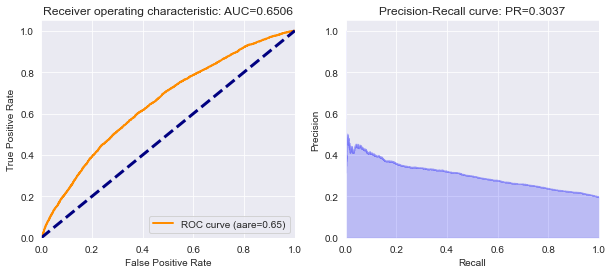

In [45]:
ROC_AUC(pros_gbm,test_using)

The left graph is the ROC curve of gradiant boosting model. Area under the curve is 0.651. The right graph is precision-recall curve. The area is 0.296.

deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%

   * ROC curve: The ROC curve plots the true positive rate vs. the false rositive sate

	  * The area under the curve (AUC): A value between 0.5 (random) and 1.0 (perfect), measuring the prediction accuracy

   * Recall (R) = The number of true positives / (the number of true positives + the number of false negatives)



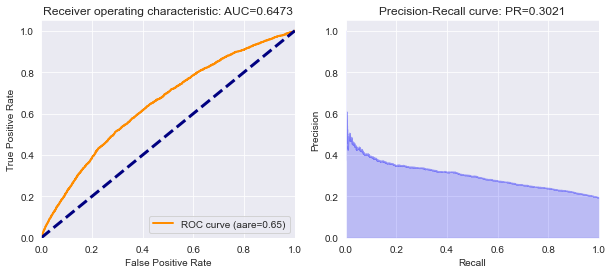

In [46]:
ROC_AUC(dl,test_using)

The left graph is the ROC curve of deep learning model. Area under the curve is 0.6457, which shows that this model performs worse than gradiant boosting model. The right graph is precision-recall curve. The area is 0.2925. Since high precision relates to a low false positive rate, and high recall relates to a low false negative rate, this graph shows that deep learning model performs better than gradiant boosting model.

# Assignment 11

In assignment 10, the following features are dropped by AutoML as bad and constant columns: [TD062, CR012, TD029, TD028, TD027, TD026, TD025, AP005]. So we make sure that we do not include them in our model.

In [47]:
feature

['AP001',
 'AP003_woe',
 'AP008_woe',
 'CR009_1_woe',
 'CR015',
 'CR019',
 'PA022_1_woe',
 'PA023_1_woe',
 'PA029_1_woe',
 'TD001',
 'TD005',
 'TD006',
 'TD009',
 'TD010',
 'TD014']

In [85]:
feature = ['AP003_woe', 'TD009', 'CR015', 'TD014', 'TD005', 'PA022_1_woe', 'PA023_1_woe', 'TD001', 'AP008_woe', 'AP001']

Use the train and test data that we have from previous weeks with woe.

In [86]:
X_train = train_woe[feature]
y_train = train_woe['loan_default']
#y = y.to_frame()
train_using = X
train_using['loan_default'] = y
train_using.head()


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,AP001,AP003_woe,AP008_woe,CR009_1_woe,CR015,CR019,PA022_1_woe,PA023_1_woe,PA029_1_woe,TD001,TD005,TD006,TD009,TD010,TD014,loan_default
0,35,0.18,0.05,0.01,5,2,-0.13,-0.12,-0.0,0,4,1,5,2,2,0
1,26,-0.53,-0.10,0.01,4,3,0.26,0.30,-0.0,3,7,1,9,1,4,0
2,25,-0.15,0.05,0.01,3,4,-0.13,-0.12,-0.0,3,6,1,8,1,1,0
3,39,0.18,0.11,0.01,5,4,-0.13,-0.12,-0.0,3,3,1,6,2,2,0
4,25,-0.15,0.06,0.01,5,6,0.26,0.30,-0.0,1,3,1,4,2,2,1


In [87]:
X_test = test_woe[feature]
y_test = test_woe['loan_default']
#y = y.to_frame()
test_using = X
test_using['loan_default'] = y
test_using.head()


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,AP001,AP003_woe,AP008_woe,CR009_1_woe,CR015,CR019,PA022_1_woe,PA023_1_woe,PA029_1_woe,TD001,TD005,TD006,TD009,TD010,TD014,loan_default
0,35,0.18,0.05,0.01,5,2,-0.13,-0.12,-0.0,0,4,1,5,2,2,0
1,26,-0.53,-0.10,0.01,4,3,0.26,0.30,-0.0,3,7,1,9,1,4,0
2,25,-0.15,0.05,0.01,3,4,-0.13,-0.12,-0.0,3,6,1,8,1,1,0
3,39,0.18,0.11,0.01,5,4,-0.13,-0.12,-0.0,3,3,1,6,2,2,0
4,25,-0.15,0.06,0.01,5,6,0.26,0.30,-0.0,1,3,1,4,2,2,1


# Build Model

Decision tree model

In [88]:
from sklearn.tree import DecisionTreeRegressor

In [89]:
#!pip install shap

In [90]:
tree1 = DecisionTreeRegressor()
tree1.fit(X_train, y_train)
y_predict = tree1.predict(X_test)

Random forest model

In [91]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(max_depth=6, random_state=0, n_estimators=10)
model.fit(X_train, y_train)
print(model.feature_importances_)

[0.21773903 0.38275899 0.09018317 0.07917918 0.06730492 0.03277027
 0.02958841 0.04133307 0.02555343 0.03358952]


In [92]:
from sklearn.tree import DecisionTreeRegressor
model1 = DecisionTreeRegressor()
model1.fit(X_train, y_train)
print(model.feature_importances_)

[0.21773903 0.38275899 0.09018317 0.07917918 0.06730492 0.03277027
 0.02958841 0.04133307 0.02555343 0.03358952]


Compare the importance graph of 2 models

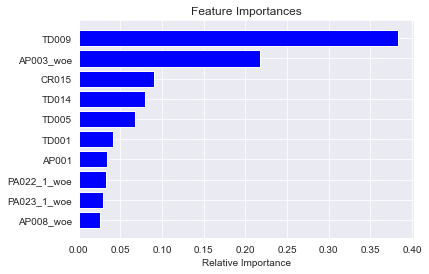

In [93]:

importances = model.feature_importances_
indices = np.argsort(importances)

features = X_train.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

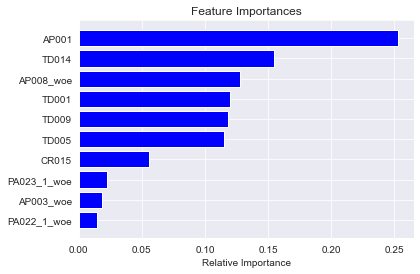

In [94]:
importances = model1.feature_importances_
indices = np.argsort(importances)

features = X_train.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Compare decision tree and random forest, random forest model shows a more relative importance towards a few more important features. Therefore, we select random forest model to do further analysis.

# SHAP Analysis

In [95]:
import shap
shap_values = shap.TreeExplainer(model).shap_values(X_train)

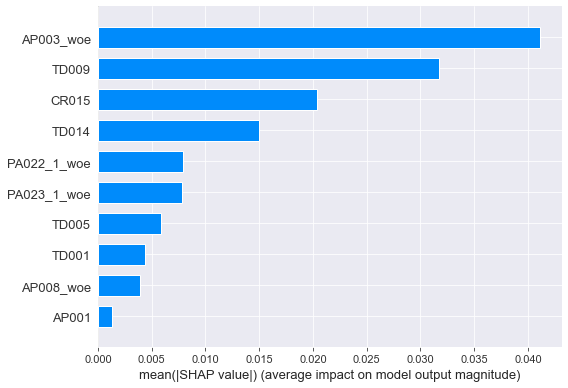

In [96]:
shap.summary_plot(shap_values[:10], X_train, plot_type="bar")

This graph is the summary plot under SHAP that shows feature importance. However, it is in absolute value, which we cannot see if the correlation is positive or negative. Therefore, we draw the following graph.

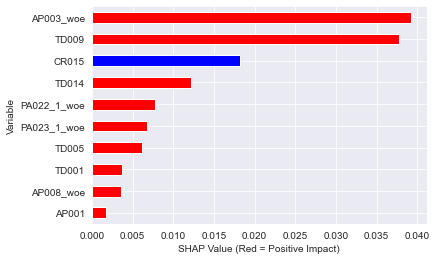

In [97]:
def ABS_SHAP(df_shap,df):
    #import matplotlib as plt
    # Make a copy of the input data
    shap_v = pd.DataFrame(df_shap)
    feature_list = df.columns
    shap_v.columns = feature_list
    df_v = df.copy().reset_index().drop('index',axis=1)

    # Determine the correlation in order to plot with different colors
    corr_list = list()
    for i in feature_list:
        b = np.corrcoef(shap_v[i],df_v[i])[1][0]
        corr_list.append(b)
    corr_df = pd.concat([pd.Series(feature_list),pd.Series(corr_list)],axis=1).fillna(0)
    # Make a data frame. Column 1 is the feature, and Column 2 is the correlation coefficient
    corr_df.columns  = ['Variable','Corr']
    corr_df['Sign'] = np.where(corr_df['Corr']>0,'red','blue')

    # Plot it
    shap_abs = np.abs(shap_v)
    k=pd.DataFrame(shap_abs.mean()).reset_index()
    k.columns = ['Variable','SHAP_abs']
    k2 = k.merge(corr_df,left_on = 'Variable',right_on='Variable',how='inner')
    k2 = k2.sort_values(by='SHAP_abs',ascending = True)
    colorlist = k2['Sign']
    ax = k2.plot.barh(x='Variable',y='SHAP_abs',color = colorlist, figsize=(6,4),legend=False)
    ax.set_xlabel("SHAP Value (Red = Positive Impact)")

ABS_SHAP(shap_values,X_train)

This graph shows the feature importance with the sign of each feature. The red ones represent positive and blue ones represent negative.

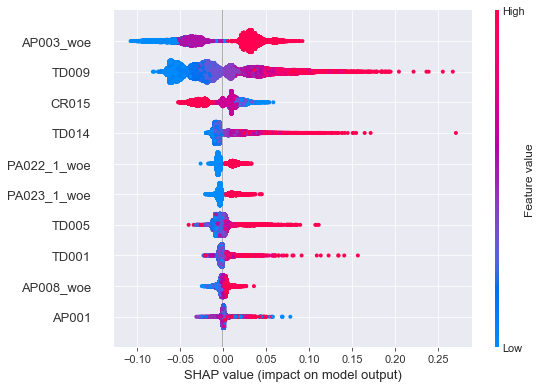

In [98]:
shap.summary_plot(shap_values, X_train)

From the summary plot, we can see that the top 5 features are AP003_woe, TD009, CR015, TD014, and PA022_1_woe. We will do further analysis on those features with dependence plot.

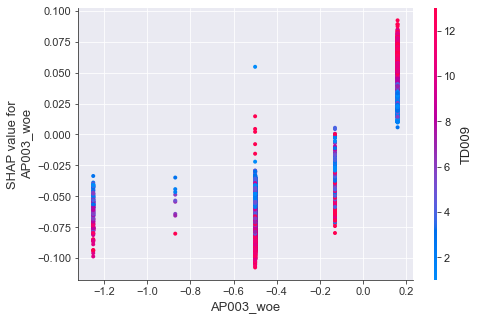

In [99]:
shap.dependence_plot("AP003_woe", shap_values, X_train)

AP003 represents education. Over 50% of data has education level 1. We can see a positive correlation between this variable and y, which means that when education level increase, the loan default rate increase.

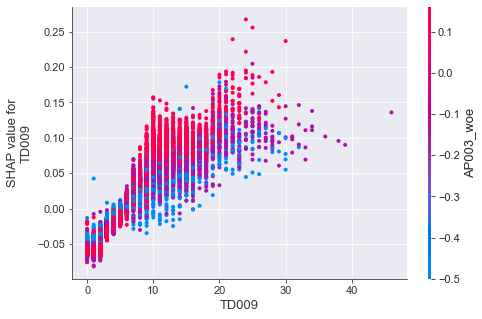

In [100]:
shap.dependence_plot("TD009", shap_values, X_train)

TD009 represents the count of query of P2P from last three months to today. The default rate is mostly increasing and it has a positive correlation with y. In the graph, we can see that the distribution is more narrow when it is lower and became more spread out when it increases.

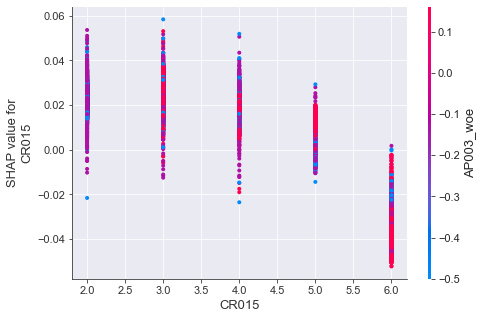

In [101]:
shap.dependence_plot("CR015", shap_values, X_train)

CR015 represents the number of months that have completed since the loan origination Date. Most data has MOB of 4 and 5. Those with MOB of 3 has the highest default rate. It has a negative correlation with y. As the number of months decrease, the loan default increase.

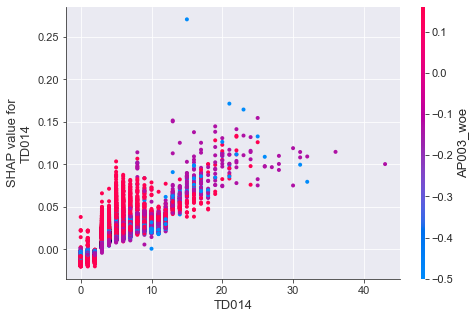

In [102]:
shap.dependence_plot("TD014", shap_values, X_train)

TD014 represents the count of query of small loan from last six months to today. The y value e is mostly increasing and the graph shows a positive correlation. As the count increases, the default rate increases as well.

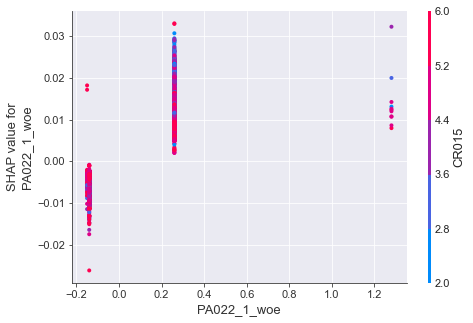

In [103]:
shap.dependence_plot("PA022_1_woe", shap_values, X_train)

PA022 represents the days between application and first collection or high risk call. It has a weak positive correlation with y value, which means that a higher number of days between application and first collection leads to a higher loan default rate.

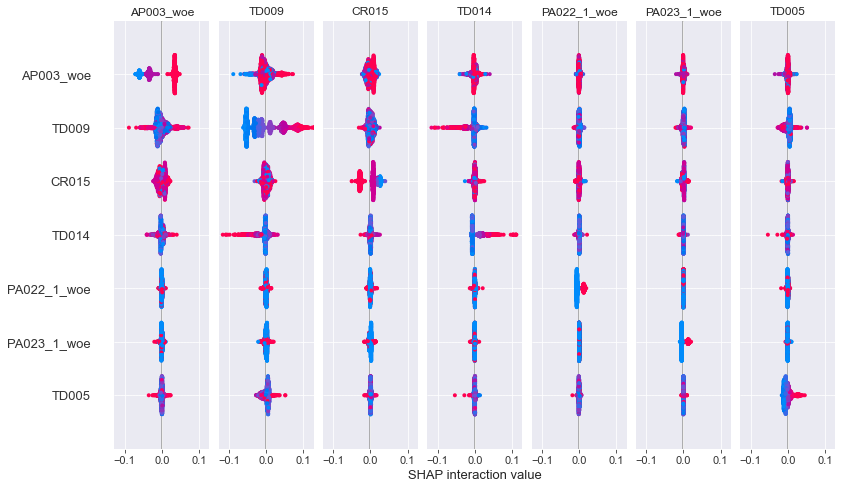

In [104]:
shap_interaction_values = shap.TreeExplainer(model).shap_interaction_values(X_train.iloc[:2000,:])

shap.summary_plot(shap_interaction_values, X_train.iloc[:2000,:])

This is a heat map that shows the correlation between the independent variables.

In [105]:
X_output = X_test.copy()
X_output.loc[:,'predict'] = np.round(model.predict(X_output),2)

random_picks = np.arange(1,330,50)
S = X_output.iloc[random_picks]
S

,AP003_woe,TD009,CR015,TD014,TD005,PA022_1_woe,PA023_1_woe,TD001,AP008_woe,AP001,predict
1,-0.53,9,4,4,7,0.26,0.30,3,-0.10,26,0.18
51,-0.15,10,6,1,9,0.26,-0.12,3,0.06,29,0.25
101,-0.53,8,5,6,4,-0.13,-0.12,3,0.06,27,0.14
151,0.18,5,6,5,5,-0.13,-0.12,3,0.06,28,0.26
201,0.18,5,6,1,4,0.26,0.30,3,0.06,36,0.20
251,-0.53,12,5,5,3,0.26,0.30,1,-0.10,27,0.18
301,0.18,6,5,4,5,0.26,0.30,0,0.11,27,0.33


This table shows a summary of each variable. It shows the first, 51st, 101st, and so on values at the data set.

The following are the force_plot for 4 individual observations.

In [106]:
shap.initjs()

In [107]:
def shap_plot(j):
    explainerModel = shap.TreeExplainer(model)
    shap_values_Model = explainerModel.shap_values(S)
    p = shap.force_plot(explainerModel.expected_value, shap_values_Model[j], S.iloc[[j]])
    return(p)

In [108]:
X_train.mean()

AP003_woe      -0.020792
TD009           5.402449
CR015           4.924955
TD014           2.603595
TD005           3.594128
PA022_1_woe    -0.011870
PA023_1_woe    -0.012463
TD001           1.988272
AP008_woe      -0.000922
AP001          31.702127
dtype: float64

In [109]:
y_test.mean()

0.19492589801557397

In [110]:
shap_plot(0)

The output value is 0.18, which is the prediction for the observation. The base value is the mean prediction of Y_test, which is 0.1946. The above graph shows that AP003, PA022, and PA023 contributes to push the final prediction lower. And CR015, TD009, and TD014 are pushing the final prediction higher.

In [111]:
shap_plot(1)

The output value is 0.23, which is the prediction for the observation. The base value is the mean prediction of Y_test, which is 0.1946. The above graph shows that AP003 contributes to push the final prediction lower. And CR015, PA022, TD014, PA023, TD009, and TD014 are pushing the final prediction higher.

In [112]:
shap_plot(2)

The output value is 0.13, which is the prediction for the observation. The base value is the mean prediction of Y_test, which is 0.1946. The above graph shows that TD009, AP003, CR015, TD005, TD014, and TD001 contributes to push the final prediction lower. And PA022 and PA023 are pushing the final prediction higher.

In [113]:
shap_plot(3)

The output value is 0.19, which is the prediction for the observation. The base value is the mean prediction of Y_test, which is 0.1946. The above graph shows that AP003, PA008, TD001, and CR015 contributes to push the final prediction higher. And PA022, PA023, TD009, and TD014 are pushing the final prediction lower.

In [114]:
shap_plot(4)

The output value is 0.17, which is the prediction for the observation. The base value is the mean prediction of Y_test, which is 0.1946. The above graph shows that TD009 and TD014 contributes to push the final prediction lower. And CR015, AP001, and AP003 are pushing the final prediction higher.